In [1]:
import pandas as pd
import numpy as np
import re

### Create doc to vector

In [2]:
columns_movies = ["movie_id", "title", "imdb_idx",
                  "movie_kind", "release", "imdb_id", "phonetic", "episode_id",
                  "season", "episode", "series_years", "md5"]

df_IMDb_movies = pd.read_csv('data/title.csv', delimiter=',', names=columns_movies, encoding = "ISO-8859-1", low_memory=False) 
df_IMDb_movies = df_IMDb_movies.drop(columns=["imdb_idx", "imdb_id", "phonetic", "md5", "episode_id", "episode", "movie_kind", "season", "series_years"])
df_IMDb_movies = df_IMDb_movies.dropna(subset=['release'])
df_IMDb_movies["release"] = df_IMDb_movies["release"].apply(lambda x : str(int(x)).split("-")[-1])
# we lowered in MovieLens as well
df_IMDb_movies = df_IMDb_movies.dropna(subset=["title"])
df_IMDb_movies["title"] = df_IMDb_movies["title"].apply(lambda x: x.lower())

# drop rows where movie starts with brackets, those are some strange names...
df_IMDb_movies = df_IMDb_movies[~df_IMDb_movies.title.str.startswith("(")]

# handle seven (se7en) movies, creating new rows containing the content of brackets
_df = df_IMDb_movies[df_IMDb_movies.title.str.contains("(", regex=False)]
_df.title = _df.title.apply(lambda x: re.search(r'\((.*?)\)', x).group(1).strip() if re.search(r'\((.*?)\)', x) else x.strip())
df_IMDb_movies = df_IMDb_movies.append(_df)

print(df_IMDb_movies.dtypes)
print(df_IMDb_movies.shape)
df_IMDb_movies.head()

/Users/dias/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


movie_id     int64
title       object
release     object
dtype: object
(1776458, 3)


,movie_id,title,release
1,5156,josie duggar's 1st shoes,2010
5,40704,anniversary,1971
7,149337,mellody hobson,2005
8,32020,kiss me kate,2011
10,112085,the best of olivia,2008


In [3]:
def clean_movie_title(movie_title):
    if movie_title.split(" ")[-1].startswith("("):
        # remove year from the title, e.g. Toy Story (1995) --> Toy Story
        movie_title = (" ".join(movie_title.split(" ")[:-1])).strip()

    if movie_title.title().split(',')[-1].strip() in ['The', 'A']:
        # article + movie title, e.g. Saint, The --> The Saint
        movie_title = (movie_title.title().split(',')[-1].strip() + " " + " ".join(movie_title.title().split(',')[:-1])).strip()

    # otherwise, it was converting The Devil's Advocate to The Devil'S Advocate
    movie_title = movie_title.lower()
    return movie_title

In [4]:
column_item = ["movie_id_ml", "title", "release", "vrelease", "url", "unknown", 
                    "action", "adventure", "animation", "childrens", "comedy",
                   "crime", "documentary", "drama", "fantasy", "noir", "horror",
                   "musical", "mystery", "romance", "scifi", "thriller",
                   "war", "western"]

df_ML_movies = pd.read_csv('data/u.item', delimiter='|', names=column_item, encoding = "ISO-8859-1") 
df_ML_movies = df_ML_movies.drop(columns=["vrelease"])
df_ML_movies["title"] = df_ML_movies["title"].apply(lambda row : clean_movie_title(row))   
df_ML_movies["release"] = df_ML_movies["release"].apply(lambda x : str(x).split("-")[-1])

# drop rows where movie starts with brackets, those are some strange names...
df_ML_movies = df_ML_movies[~df_ML_movies.title.str.startswith("(")]

# handle seven (se7en) movies, creating new rows containing the content of brackets
_df = df_ML_movies[df_ML_movies.title.str.contains("(", regex=False)]
_df.title = _df.title.apply(lambda x: re.search(r'\((.*?)\)', x).group(1).strip() if re.search(r'\((.*?)\)', x) else x.strip())
df_ML_movies = df_ML_movies.append(_df)

print(df_ML_movies.shape)
print(df_ML_movies.dtypes)
df_ML_movies.head()

(1767, 23)
movie_id_ml     int64
title          object
release        object
url            object
unknown         int64
action          int64
adventure       int64
animation       int64
childrens       int64
comedy          int64
crime           int64
documentary     int64
drama           int64
fantasy         int64
noir            int64
horror          int64
musical         int64
mystery         int64
romance         int64
scifi           int64
thriller        int64
war             int64
western         int64
dtype: object


/Users/dias/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,movie_id_ml,title,release,url,unknown,action,adventure,animation,childrens,comedy,...,fantasy,noir,horror,musical,mystery,romance,scifi,thriller,war,western
0,1,toy story,1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,goldeneye,1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,four rooms,1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,get shorty,1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,copycat,1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
df = pd.merge(df_ML_movies, df_IMDb_movies, on=["title", "release"])
movie_ids = list(df.movie_id_ml.unique())

In [6]:
movie_dim = max(list(df_ML_movies.movie_id_ml.unique()))
movie_dim

1682

### Create keyword to vector

In [7]:
column_movie_keyword = ["mkid", "movie_id", "keyword_id"]

df_movie_keyword = pd.read_csv('data/movie_keyword.csv', delimiter=',', names=column_movie_keyword, encoding = "ISO-8859-1") 
print(df_movie_keyword.dtypes)
print(df_movie_keyword.shape)
df_movie_keyword = df_movie_keyword.drop(columns=["mkid"])
df_movie_keyword.head()

mkid          int64
movie_id      int64
keyword_id    int64
dtype: object
(4523930, 3)


,movie_id,keyword_id
0,2,1
1,11,2
2,22,2
3,44,3
4,24,2


In [8]:
df_movies_keywords = pd.merge(df, df_movie_keyword, on="movie_id")
df_movies_keywords = df_movies_keywords[["movie_id_ml","keyword_id"]]
df_movies_keywords.head()

,movie_id_ml,keyword_id
0,1,834
1,1,2956
2,1,66752
3,1,93318
4,1,73783


In [9]:
column_keyword = ["keyword_id", "keyword", "phonetic"]

df_keyword = pd.read_csv('data/keyword.csv', delimiter=',', names=column_keyword, encoding = "ISO-8859-1") 
print(df_keyword.dtypes)
print(df_keyword.shape)
df_keyword = df_keyword.drop(columns=["phonetic"])
df_keyword.head()

keyword_id     int64
keyword       object
phonetic      object
dtype: object
(134170, 3)


,keyword_id,keyword
0,2068,handcuffed-to-a-bed
1,157,jane-austen
2,8309,narcotic
3,1059,woods
4,3991,hanging


In [10]:
np_movies_keywords = df_movies_keywords.to_numpy()
np_movies_keywords

array([[    1,   834],
       [    1,  2956],
       [    1, 66752],
       ...,
       [ 1575,  2242],
       [ 1575, 11548],
       [ 1635,     1]])

In [11]:
keyword_vector = np.zeros((movie_dim, df_keyword.shape[0]))

for i in range(np_movies_keywords.shape[0]) :
    row = np_movies_keywords[i,0]-1
    column = np_movies_keywords[i,1]-1
    keyword_vector[row, column] = 1
        

In [12]:
useful_keywords = []

for i in range(keyword_vector.shape[1]) :
    cnt = keyword_vector[:,i].sum()
    if cnt > 1 :
        useful_keywords += [i]
        
print(len(useful_keywords))
keyword_vector = keyword_vector[:,useful_keywords]
print(keyword_vector.shape)
print(keyword_vector.sum())

10243
(1682, 10243)
89924.0


### Create cast vector

In [13]:
columns_roles = ["role_id", "cast_role"]

df_roles = pd.read_csv('data/role_type.csv', delimiter=',', names=columns_roles, encoding = "ISO-8859-1") 
print(df_roles.dtypes)
print(df_roles.shape)
df_roles.head()

role_id       int64
cast_role    object
dtype: object
(12, 2)


,role_id,cast_role
0,1,actor
1,2,actress
2,3,producer
3,4,writer
4,5,cinematographer


In [14]:
column_cast = ["cast_id", "person_id", "movie_id", "person_role_id", "note", "nr_order", "role_id"]

df_cast = pd.read_csv('data/cast_info.csv', delimiter=',', names=column_cast, encoding = "ISO-8859-1", low_memory=False) 
df_cast['role_id'] = pd.to_numeric(df_cast['role_id'], errors='coerce')
df_cast = df_cast.drop(columns=["note", "nr_order", "person_role_id"])

print(df_cast.dtypes)
print(df_cast.shape)
df_cast.head()

cast_id        int64
person_id      int64
movie_id       int64
role_id      float64
dtype: object
(36243322, 4)


,cast_id,person_id,movie_id,role_id
0,1,1,968504,1.0
1,2,2,2163857,1.0
2,3,2,2324528,1.0
3,4,3,1851347,1.0
4,5,4,1681365,1.0


In [15]:
column_people = ["person_id", "cast_name", "imdb_idx", "imdb_id", "cast_gender", "name_cf", "name_nf", "surname", "md5"]

df_people = pd.read_csv('data/name.csv', delimiter=',', names=column_people, encoding = "ISO-8859-1", low_memory=False) 

print(df_people.dtypes)
print(df_people.shape)
df_people = df_people.drop(columns=["imdb_idx", "imdb_id", "md5", "name_cf", "name_nf", "surname"])
df_people.head()

person_id        int64
cast_name       object
imdb_idx        object
imdb_id        float64
cast_gender     object
name_cf         object
name_nf         object
surname         object
md5             object
dtype: object
(4167491, 9)


,person_id,cast_name,cast_gender
0,3343,"Abela, Mike",m
1,446,"A., David",m
2,126,"-Alverio, Esteban Rodriguez",m
3,1678,"Abbas, Athar",m
4,3610,"Aberer, Leo",m


In [16]:
df_cast_ml = pd.merge(df, df_cast, on="movie_id")
df_cast_ml = pd.merge(df_cast_ml, df_roles, on="role_id")
df_cast_ml = df_cast_ml[["movie_id_ml","person_id","cast_role"]]
df_cast_ml.head()

,movie_id_ml,person_id,cast_role
0,1,30260,actor
1,1,46332,actor
2,1,46332,actor
3,1,66226,actor
4,1,128339,actor


In [17]:
np_cast = df_cast_ml.to_numpy()

In [18]:
cast_vector = np.zeros((movie_dim, df_people.shape[0]))

for i in range(np_cast.shape[0]) :
    row = np_cast[i,0]-1
    column = np_cast[i,1]-1
    cast_vector[row, column] = 1
        

In [19]:
useful_cast = []

for i in range(cast_vector.shape[1]) :
    cnt = cast_vector[:,i].sum()
    if cnt > 1 :
        useful_cast += [i]
        
print(len(useful_cast))
cast_vector = cast_vector[:,useful_cast]
print(cast_vector.shape)
print(cast_vector.sum())

19932
(1682, 19932)
64946.0


In [20]:
### Creating the total vector

In [21]:
movie_vec = np.concatenate((keyword_vector, cast_vector), axis=1)
movie_vec.shape

(1682, 30175)

In [22]:
genres = ["movie_id_ml", "unknown", "action", "adventure", "animation", "childrens", "comedy",
                   "crime", "documentary", "drama", "fantasy", "noir", "horror",
                   "musical", "mystery", "romance", "scifi", "thriller",
                   "war", "western"]

df_genres = df_ML_movies[genres]

In [23]:
np_genres = df_genres.to_numpy()

In [24]:
np_genres.shape

(1767, 20)

In [25]:
genre_vector = np.zeros((movie_dim, 19))

for i in range(np_genres.shape[0]) :
    row = np_genres[i,0]-1
    genre_vector[row,:] += np_genres[i,1:]
    
genre_vector = (genre_vector > 0).astype(int)

In [26]:
genre_vector.shape

(1682, 19)

In [27]:
movie_vec = np.concatenate((movie_vec, genre_vector), axis=1)
movie_vec.shape

(1682, 30194)

### Computing cosine similarity

In [28]:
movie_vec_norm = np.zeros(movie_vec.shape)

for i in range(movie_vec_norm.shape[0]) :
    local_norm = np.linalg.norm(movie_vec[i,:])
    if local_norm > 0:
        movie_vec_norm[i,:] = movie_vec[i,:]/local_norm

In [29]:
movie_dist_cosine = np.zeros((movie_vec.shape[0], movie_vec.shape[0]))

for i in range(movie_vec_norm.shape[0]) :
    for j in range(movie_vec_norm.shape[0]) :
        if i < j :
            dist = movie_vec_norm[i,:].dot(movie_vec_norm[j,:])
            movie_dist_cosine[i,j] = dist
            movie_dist_cosine[j,i] = dist

In [30]:
np.save("cosine.dat", movie_dist_cosine)

In [31]:
threshold1 = 0.01
threshold2 = 0.01
threshold3 = 0.05
threshold4 = 0.1

movie_graph1 = (movie_dist_cosine > threshold1).astype(int)
movie_graph2 = (movie_dist_cosine > threshold2).astype(int)
movie_graph3 = (movie_dist_cosine > threshold3).astype(int)
movie_graph4 = (movie_dist_cosine > threshold4).astype(int)

In [32]:
from matplotlib import pyplot as plt

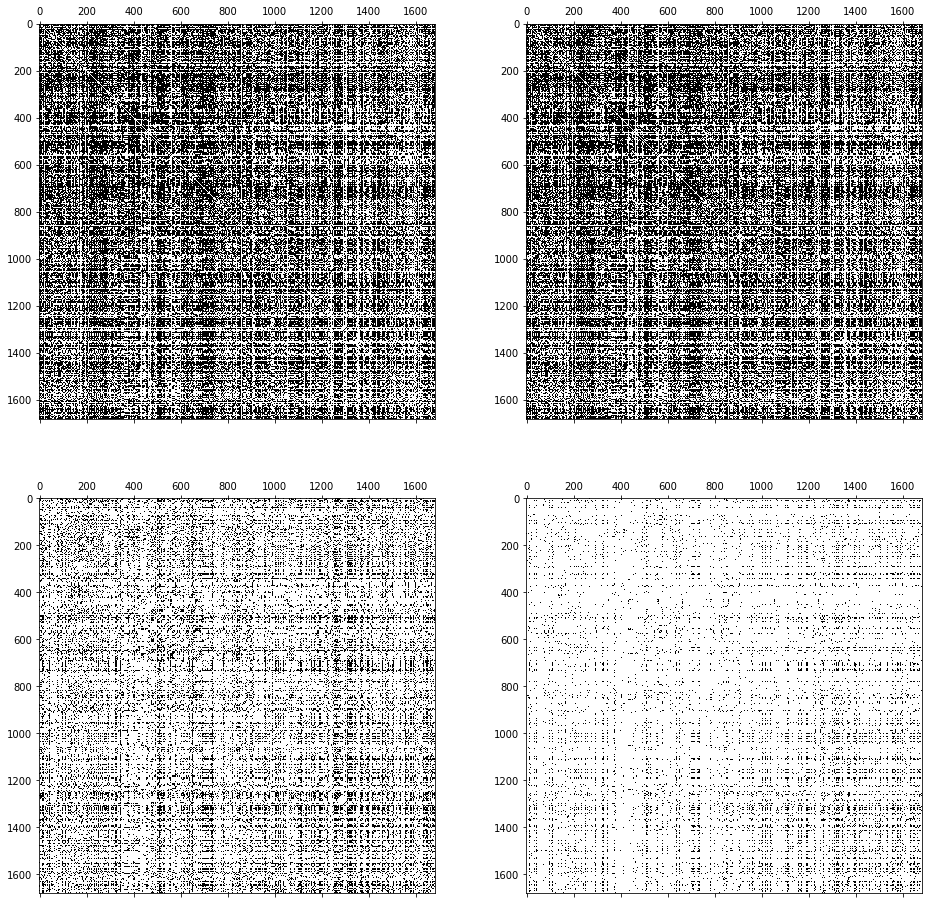

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
axes[0, 0].spy(movie_graph1);
axes[0, 1].spy(movie_graph2);
axes[1, 0].spy(movie_graph3);
axes[1, 1].spy(movie_graph4);

### Spectral analysis

In [34]:
def compute_laplacian(adjacency: np.ndarray, normalize: bool):
    """ Return:
        L (n x n ndarray): combinatorial or symmetric normalized Laplacian.
    """
    # Your code here
    n = adjacency.shape[0]
    
    # D is degree matrix (in our case the degree is represented with the weight of edge)
    D = np.diag(np.sum(adjacency, axis=1))
    L = D - adjacency
    
    if not normalize:
        return L

    # L_norm = D^(-1/2) @ L @ D^(-1/2)
    D_norm = np.diag(np.sum(adjacency, axis=1)**(-0.5))
    L_norm = D_norm @ L @ D_norm
    
    return L_norm

In [35]:
adjacency = movie_graph4 * movie_dist_cosine

In [36]:
laplacian_comb = compute_laplacian(adjacency, normalize=False)

In [37]:
def spectral_decomposition(laplacian: np.ndarray):
    """ Return:
        lamb (np.array): eigenvalues of the Laplacian
        U (np.ndarray): corresponding eigenvectors.
    """
    # Your code here
    lamb, U = np.linalg.eigh(laplacian)
    
    #order the eigenvalues
    sortInd = np.argsort(lamb)
    
    return lamb[sortInd], U[:, sortInd]

In [38]:
lamb_comb, U_comb = spectral_decomposition(laplacian_comb)

Text(0.5,1,'Eigenvalues $L_{comb}$')

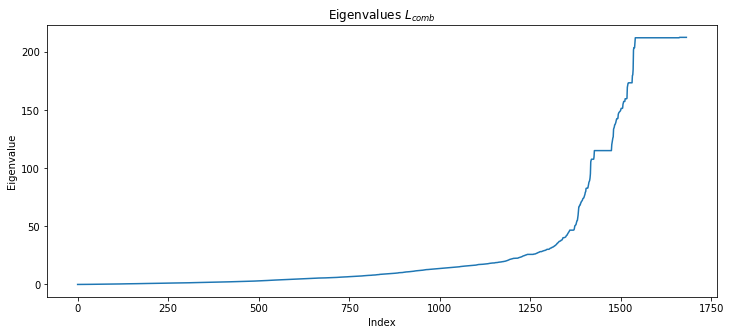

In [39]:
plt.figure(figsize=(12,5))
plt.plot(lamb_comb)
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues $L_{comb}$')

### k Nearest-Neighbors

In [67]:
k = 10

In [41]:
np_ml_movies = df_ML_movies.to_numpy()
np_ml_movies

array([[1, 'toy story', '1995', ..., 0, 0, 0],
       [2, 'goldeneye', '1995', ..., 1, 0, 0],
       [3, 'four rooms', '1995', ..., 1, 0, 0],
       ...,
       [1639, 'azucar amargo', '1996', ..., 0, 0, 0],
       [1652, 'feng yue', '1997', ..., 0, 0, 0],
       [1682, 'schrei aus stein', '1996', ..., 0, 0, 0]], dtype=object)

In [42]:
for i in range(adjacency.shape[0]):
    idx = adjacency[i,:].argsort()[-k:]
    idx = [j for j in idx if adjacency[i,j] > 0]
    neighbors = [(np_ml_movies[j,1], adjacency[i,j]) for j in idx]
    print(i,np_ml_movies[i,1],neighbors)

0 toy story [('first kid', 0.12477059832810866), ('beauty and the beast', 0.12648537023883405), ('the next karate kid', 0.1269148633940705), ('the lion king', 0.13525532533308657), ('home alone', 0.14160406371033446)]
1 goldeneye [('desperado', 0.16598500055174645), ('die hard', 0.17169807684373387), ('broken arrow', 0.1719615458857992), ('true lies', 0.17642698833636178), ('tomorrow never dies', 0.3405453090913766)]
2 four rooms [('reservoir dogs', 0.1056986713719224), ('my crazy life (mi vida loca)', 0.10886919764059902), ('pulp fiction', 0.12310172557575678), ('from dusk till dawn', 0.15725339290258844), ('jackie brown', 0.18279774199874466)]
3 get shorty [('the jerky boys', 0.10540925533894598), ('welcome to the dollhouse', 0.10540925533894598), ('wag the dog', 0.10540925533894598), ('salut cousin!', 0.10540925533894598), ('faster pussycat! kill! kill!', 0.12909944487358058)]
4 copycat [('the silence of the lambs', 0.12407291674636625), ('metro', 0.1264560818715471), ('jade', 0.127

389 fear of a black hat [('sudden manhattan', 0.12403473458920847), ('rocket man', 0.12403473458920847), ('denise calls up', 0.12403473458920847), ('to wong foo, thanks for everything! julie newmar', 0.12403473458920847), ('sprung', 0.14533152317968118)]
390 last action hero [('terminator 2: judgment day', 0.16350689614778208), ('escape from l.a.', 0.16460687199563775), ('the terminator', 0.17057112202676794), ('demolition man', 0.17786817760200346), ('die hard: with a vengeance', 0.19714401374219764)]
391 the man without a face [('hate (haine, la)', 0.1203858530857692), ("enfer, l'", 0.1203858530857692), ('world of apu, the (apur sansar)', 0.1203858530857692), ('scream of stone (schrei aus stein)', 0.1203858530857692), ("wooden man's bride, the (wu kui)", 0.13900960937138318)]
392 mrs. doubtfire [('jack', 0.105927749639861), ('mary poppins', 0.1096456377076613), ('made in america', 0.11424779342038552), ('getting even with dad', 0.12116331240741796), ('nine months', 0.1980268454586999

728 nell [('hate (haine, la)', 0.11624763874381928), ('nelly & monsieur arnaud', 0.11624763874381928), ('scream of stone (schrei aus stein)', 0.11624763874381928), ('home for the holidays', 0.11770993067570133), ('kika', 0.11961783342433499)]
729 queen margot (reine margot, la) [('oscar & lucinda', 0.9999999999999998), ('mrs. brown (her majesty, mrs. brown)', 0.9999999999999998), ('up close and personal', 0.9999999999999998), ("william shakespeare's romeo and juliet", 0.9999999999999998), ('the pillow book', 0.9999999999999998)]
730 corrina, corrina [('twelfth night', 0.14301938838683886), ('cinema paradiso', 0.16514456476895412), ('brassed off', 0.16514456476895412), ('don juan demarco', 0.16514456476895412), ('wings of desire', 0.16514456476895412)]
731 dave [('naked in new york', 0.11396057645963793), ('rendezvous in paris (rendez-vous de paris, les)', 0.11396057645963793), ("roseanna's grave (for roseanna)", 0.11396057645963793), ('two much', 0.11396057645963793), ('junior', 0.1318

1390 for ever mozart [('boys life', 1.0), ('the turning', 1.0), ('drunks', 1.0), ('symphonie pastorale, la', 1.0), ('scream of stone (schrei aus stein)', 1.0)]
1391 the locusts [('scream of stone (schrei aus stein)', 0.1270001270001905), ('gang related', 0.14872731984475068), ('best men', 0.17067088443672815), ('to cross the rubicon', 0.17960530202677488), ('8 heads in a duffel bag', 0.20775007961358383)]
1392 stag [('hostile intentions', 0.15161960871578067), ('supercop', 0.18569533817705183), ('die xue shuang xiong (killer, the)', 0.18569533817705183), ('u.s. marshalls', 0.18569533817705183), ('shopping', 0.18569533817705183)]
1393 swept from the sea [('restoration', 0.1944005668723115), ('like water for chocolate (como agua para chocolate)', 0.19972375677423507), ('feast of july', 0.20673372889855324), ('the ghost and mrs. muir', 0.20980046973445315), ('anna karenina', 0.2371357478542228)]
1394 hurricane streets [('boys life', 1.0), ('the turning', 1.0), ('drunks', 1.0), ('symphonie

1561 eye of vichy, the (oeil de vichy, l') [('dadetown', 1.0), ('the line king: al hirschfeld', 1.0), ('ayn rand: a sense of life', 1.0), ('the gate of heavenly peace', 1.0), ('the haunted world of edward d. wood jr.', 1.0)]
1562 promise, the (versprechen, das) [('love and other catastrophes', 1.0), ('1-900', 1.0), ('kama sutra: a tale of love', 1.0), ('a modern affair', 1.0), ('mrs. dalloway', 1.0)]
1563 to cross the rubicon [('female perversions', 0.7071067811865475), ("star maker, the (uomo delle stelle, l')", 0.7071067811865475), ("enfer, l'", 0.7071067811865475), ('hearts and minds', 0.7071067811865475), ('scream of stone (schrei aus stein)', 0.7071067811865475)]
1564 daens [('hedd wyn', 0.1946177236735176), ('like water for chocolate (como agua para chocolate)', 0.19889806323953876), ('i, worst of all (yo, la peor de todas)', 0.20320694566243402), ('priest', 0.21483446221182986), ('germinal', 0.29446190370778014)]
1565 the man from down under [('hate (haine, la)', 0.1270001270001

### Dimensionality Reduction

In [69]:
dims = 150

reduced = U_comb[:,:dims]
reduced.shape

(1682, 150)

In [70]:
movie_dist_reduced = np.zeros((movie_vec.shape[0], movie_vec.shape[0]))

for i in range(movie_vec_norm.shape[0]) :
    for j in range(movie_vec_norm.shape[0]) :
        if i < j :
            dist = np.linalg.norm(reduced[i,:]-reduced[j,:])
            movie_dist_reduced[i,j] = dist
            movie_dist_reduced[j,i] = dist

In [71]:
for i in range(movie_dist_reduced.shape[0]):
    idx = movie_dist_reduced[i,:].argsort()[:k]
    idx = [j for j in idx if i != j]
    neighbors = [(np_ml_movies[j,1], movie_dist_reduced[i,j]) for j in idx]
    print(i,np_ml_movies[i,1],neighbors)

0 toy story [('snow white and the seven dwarfs', 0.026792911555489657), ('cinderella', 0.029362466703853708), ('pinocchio', 0.033394293679010895), ('fantasia', 0.03597270747116991), ('the aristocats', 0.038638882771857536), ('the fox and the hound', 0.03869516299492463), ('dumbo', 0.03959861246369132), ('alice in wonderland', 0.039702765867588925), ('anastasia', 0.04657517274159729)]
1 goldeneye [('tomorrow never dies', 0.010640564513512227), ('under siege', 0.012573109750684765), ('clear and present danger', 0.012576781021453652), ('the rock', 0.01258616151433939), ('drop zone', 0.012651628283638075), ('double team', 0.012682334935043109), ('last action hero', 0.012763981005513354), ('die hard: with a vengeance', 0.012787654070428731), ('street fighter', 0.012841226670949427)]
2 four rooms [('beverly hills ninja', 0.038660323928684265), ('apocalypse now', 0.07035591962189575), ('the prophecy', 0.07463651998520587), ('twelve monkeys', 0.09986957189114633), ('conspiracy theory', 0.10111

657 pump up the volume [('carrie', 0.9829219943159249), ('matilda', 0.9981469908780807), ('species', 0.9984178132603487), ('the amityville horror', 0.9989394504411302), ('grease', 0.9992103444011396), ('apt pupil', 0.999219209874822), ('to cross the rubicon', 0.9993335069330802), ('dirty dancing', 0.9994068856102859), ('the howling', 0.9994228528899755)]
658 arsenic and old lace [('evil dead ii', 0.013472115191624319), ('the body snatcher', 0.014298292470685195), ('wishmaster', 0.014592250037746059), ('candyman: farewell to the flesh', 0.015176025202347237), ('children of the corn: the gathering', 0.015360751041927755), ('vampire in brooklyn', 0.015386236219500606), ('halloween: the curse of michael myers', 0.015876352139359378), ('the addiction', 0.01634183677544084), ('first knight', 0.016682793048932124)]
659 fried green tomatoes [('bastard out of carolina', 0.009329861979808878), ('before and after', 0.00972625014633796), ('flirting with disaster', 0.012199142267031836), ('hush', 0

855 night on earth [('citizen ruth', 8.362327962122088e-05), ("i'll do anything", 8.923494651806753e-05), ('roommates', 9.128379648659915e-05), ('with honors', 9.286879050169366e-05), ('unstrung heroes', 9.33107739668718e-05), ('the evening star', 9.370592811428556e-05), ('down by law', 9.67264081703882e-05), ('renaissance man', 9.753274948321812e-05), ('trust', 0.00010221167555358158)]
856 paris was a woman [('wonderland', 0.00022819615929554782), ('brother minister: the assassination of malcolm x', 0.0005977501010224532), ('paris is burning', 0.0009391879182143715), ('marlene dietrich: shadow and light (1996) ', 0.000979530964271488), ('nico icon', 0.0010936681095934542), ('man of the year', 0.0011118770129502692), ('grateful dead', 0.001111877012950298), ("jupiter's wife", 0.001111877012950303), ('the line king: al hirschfeld', 0.0011118770129503422)]
857 amityville: dollhouse [("amityville 1992: it's about time", 0.0017945456701992527), ('amityville: a new generation', 0.0019053056

1177 major payne [('metisse (café au lait)', 5.711984327654601e-16), ('vermin', 5.996364530563556e-16), ('children of the revolution', 6.269204465416205e-16), ('cosi', 6.288026205129964e-16), ('guantanamera', 6.351267166701718e-16), ('steal big, steal little', 6.408877976628224e-16), ('in the bleak midwinter', 6.414459165058473e-16), ('ready to wear (pret-a-porter)', 6.418966263793188e-16), ('live nude girls', 6.433877448264564e-16)]
1178 man of the house [('cabin boy', 1.635002281901218e-06), ('jury duty', 2.9054175982375236e-06), ('reckless', 2.9054175987348704e-06), ('for love or money', 6.198699077496044e-06), ('it takes two', 1.6319866022426874e-05), ("gone fishin'", 1.6384301094255266e-05), ('life with mikey', 2.93992791465231e-05), ('fierce creatures', 3.8350510259276174e-05), ('amos & andrew', 3.840780879590219e-05)]
1179 i love trouble [('father of the bride part ii', 0.9707701072078327), ('the jerky boys', 0.9977917728071078), ('father of the bride', 0.9987555976817473), ('fa

1646 hana-bi [("c'est arrivé près de chez vous", 5.997928660173349e-16), ('twelfth night', 0.00011787859513524158), ('the lay of the land', 0.0001216980543213379), ('the big squeeze', 0.00012475299801963132), ('talking about sex', 0.00012827410518236846), ('what happened was...', 0.000128728029569377), ('the van', 0.00013219564121652708), ('the adventures of priscilla  queen of the desert', 0.00013219564121653117), ('salut cousin!', 0.0001321956412165318)]
1647 niagara, niagara [('stonewall', 4.606736993645653e-16), ('bread and chocolate (pane e cioccolata)', 5.032111625968227e-16), ('two or three things i know about her', 5.206814169214937e-16), ('delta of venus', 5.316297268740995e-16), ('collectionneuse, la', 5.34068920403804e-16), ('dangerous ground', 5.379408197369222e-16), ('fille seule, la (a single girl)', 5.3872148117793345e-16), ('drunks', 5.424677864703831e-16), ('homage', 5.455010363159517e-16)]
1648 the big one [('looking for richard', 0.0008916098085882674), ('tigrero: a 

### Load ratings data

In [73]:
column_ratings = ["user_id", "movie_id_ml", "rating", "rating_timestamp"]

df_ratings = pd.read_csv('data/u.data', delimiter='\t', names=column_ratings) 
df_ratings.head()

,user_id,movie_id_ml,rating,rating_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [81]:
df_ratings.groupby(by="user_id").aggregate({"movie_id_ml" : ["count"]})

,movie_id_ml
,count
user_id,
1,272
2,62
3,54
4,24
5,175
...,...
939,49
940,107


In [85]:
uid_1_ratings = df_ratings[df_ratings["user_id"]==1]
uid_1_ratings

,user_id,movie_id_ml,rating,rating_timestamp
202,1,61,4,878542420
305,1,189,3,888732928
333,1,33,4,878542699
334,1,160,4,875072547
478,1,20,4,887431883
...,...,...,...,...
92049,1,28,4,875072173
92487,1,172,5,874965478
94019,1,122,3,875241498
96699,1,152,5,878542589


In [118]:
np_ratings = uid_1_ratings.to_numpy()

print(np_ratings.shape)

np_vector_in = np.zeros((np_ratings.shape[0], dims))
np_vector_out = (np_ratings[:,2] >= 3).astype(int)

for i in range(np_ratings.shape[0]) :
    movie_id = np_ratings[i, 1]-1
    np_vector_in[i,:] = reduced[movie_id,:]
    
print(np_vector_in.shape)

(272, 4)
(272, 150)


In [119]:
from random import sample

size = int(0.8*np_ratings.shape[0])

train_set = sample(range(np_ratings.shape[0]), size)
test_set = [x for x in range(np_ratings.shape[0]) if x not in train_set]

print(size)
print(len(train_set))
print(len(test_set))

217
217
55


In [120]:
train_X = np_vector_in[train_set,:]
train_Y = np_vector_out[train_set]

test_X = np_vector_in[test_set,:]
test_Y = np_vector_out[test_set]

print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(217, 150)
(217,)
(55, 150)
(55,)


In [125]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=1, n_jobs=4)

In [126]:
neigh.fit(train_X, train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=4, n_neighbors=1, p=2,
                     weights='uniform')

In [135]:
results = neigh.predict(test_X)

print(results!=test_Y)
print((np.linalg.norm(results==test_Y) ** 2)/results.shape[0])

[False  True False  True False  True  True False False False False False
 False  True False False False False False False False  True False False
 False False False False False False  True False False False False False
 False  True  True  True  True  True False  True False  True False False
  True False False False False  True False]
0.7090909090909091
